# TAREA SEMANAL 7
## Nicolás Albano 


### Enunciado:

* Ejercicio #1
Para el siguiente cuadripolo se pide calcular los parámetros Z.

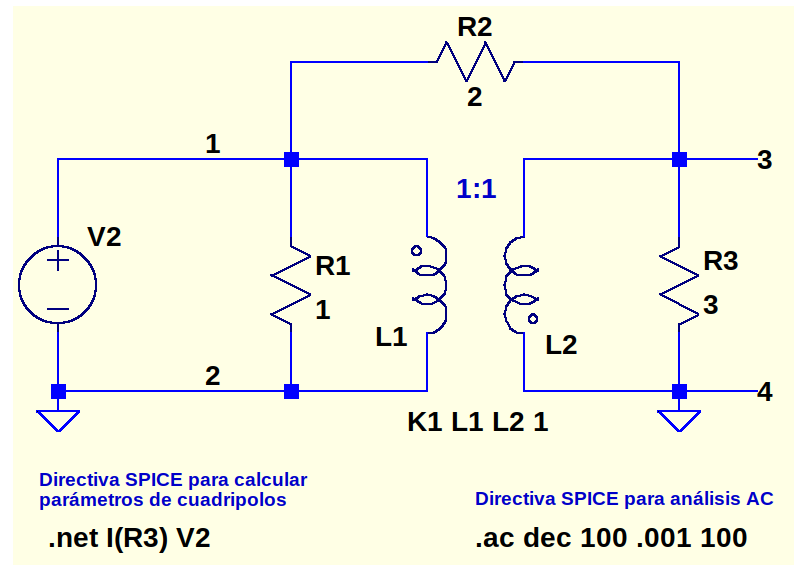

Bonus:

    +1 💎 Simular en SPICE los parámetros de cuadripolo con la directiva .net
    +1 🎓 Verifique mediante el módulo de simulación simbólica SymPy la impedancia de entrada 
    +1 🤯 Presentación en jupyter notebook

* Ejercicio #2:

Dado el siguiente circuito:

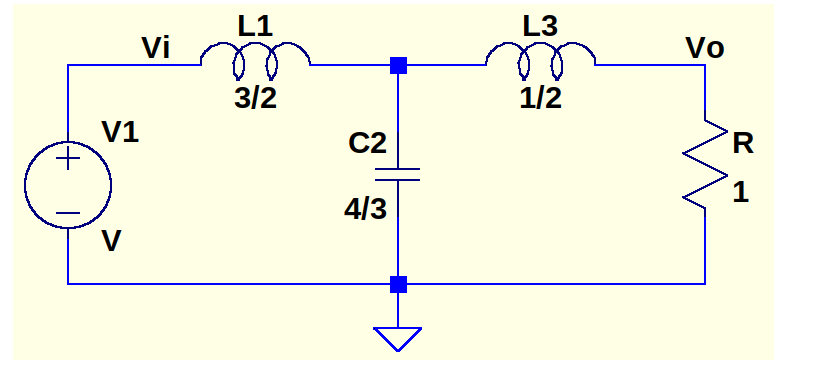


👉 Obtener la transferencia de tensión fracción V subíndice o entre V subíndice i por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C subíndice 2 igual fracción 4 entre 3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario.

👉 Construya la matriz de admitancia indefinida (MAI) del circuito.

👉 Compute la misma transferencia de tensiónfracción V subíndice o entre V subíndice i mediante MAI.

Bonus:

    +1 💎 Simular en SPICE  para verificar la transferencia.
    +1 🤯 Compute la impedancia de entrada con la MAI.
    +1 🤯 Presentación en jupyter notebook


### Resoluciones en papel de los ejercicios


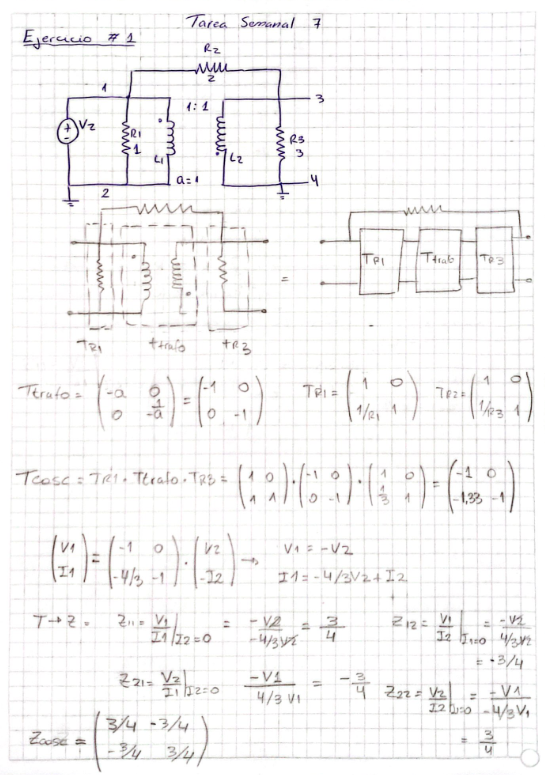

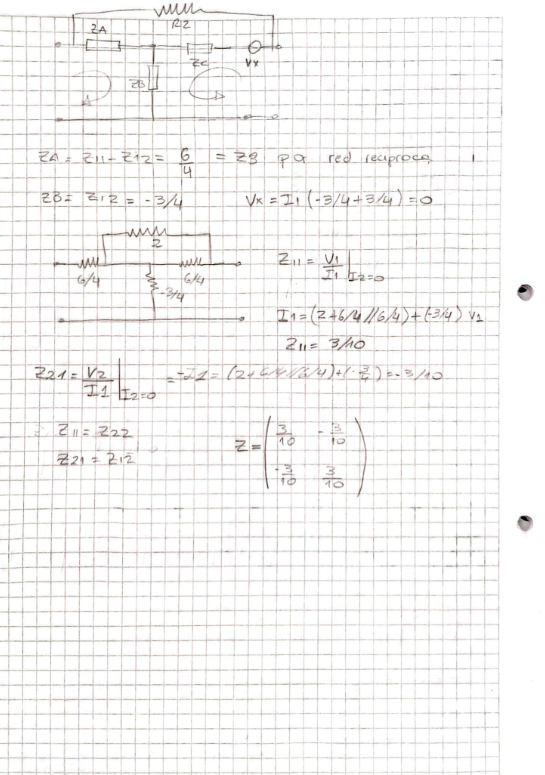

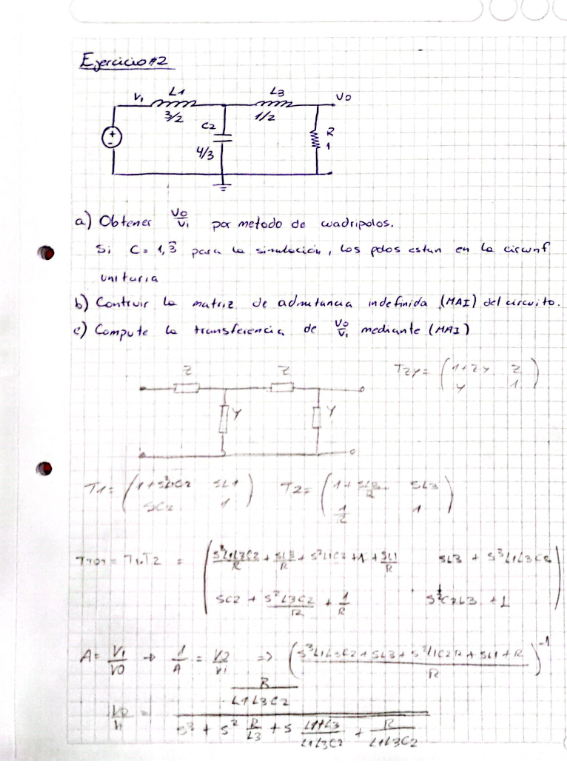

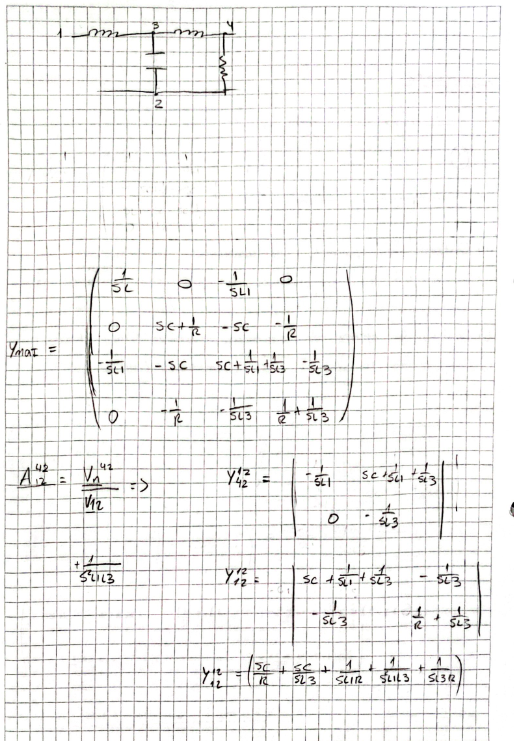

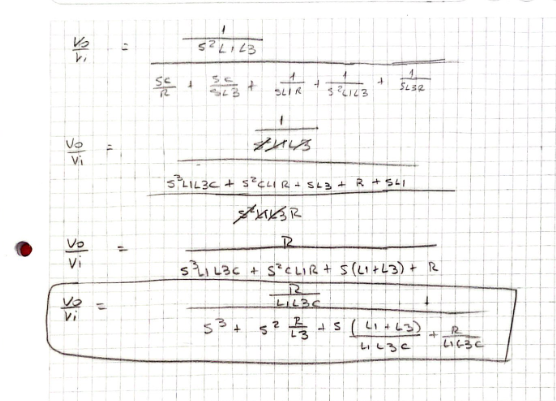



Simulacion en Python:
* Ejercicio 1

In [9]:
import sympy as sp
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn, Z2Tabcd_s
from pytc2.general import print_latex
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

a, R1, L1, L2, R2, R3 = sp.symbols('a, R1, L1, L2, R2, R3', complex=True)

Ttrafo = sp.Matrix([[-a, 0], [0, -1/a]])

Tr1=sp.Matrix([[1, 0], [1/R1, 1]])

Tr2=sp.Matrix([[1, 0], [1/R3, 1]])

Tcascada= Tr1*Ttrafo*Tr2


print_latex(a_equal_b_latex_s('T_{cascada}', Tcascada))

Zcascada=Z2Tabcd_s(Tcascada)

print_latex(a_equal_b_latex_s('Z_{cascada}', Zcascada))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora procedemos a transformar la z en una T puenteada conectando R2

In [14]:
za=Zcascada[0,0]-Zcascada[0,1]
zc=za
zb=Zcascada[0,1]

z11=((R2+zc)*za)/((R2+zc+za))+zb
z22=z11
z12=-z11
z21=z12

Zfinal=sp.Matrix([[z11, z12],[z21, z22]])
print_latex(a_equal_b_latex_s('Z_{final}', Zfinal))

Znum=Zfinal.subs({a: 1, R1: 1, R2: 2,R3: 3})
print_latex(a_equal_b_latex_s('Z_{final}', Znum))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Simulacion en Python 
* Ejercicio 2

In [21]:
L1, L3, C2, R, s = sp.symbols(' L1, L3, C2, R, s', complex=True)

Ymai=sp.Matrix([[1/(s*L1), 0, -1/(s*L1), 0],[0,s*C2+1/R,-s*C2,-1/R],[-1/(s*L1), -s*C2, s*C2+1/(s*L1)+1/(s*L3), -1/(s*L3)],[0,-1/R, -1/(s*L3),1/R+1/(s*L3)]])
print_latex(a_equal_b_latex_s('Y_{MAI}', Ymai))

Zmai = calc_MAI_impedance_ij(Ymai, 0, 1, verbose=False)
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 3, 1, 0, 1, verbose=False)

print_latex(a_equal_b_latex_s('Z_{entrada}', Zmai))
print_latex(a_equal_b_latex_s('Transf_{final}', Vmai))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Simulacion en Spice - Parametros del cuadripolo
* Ejercicio 1: 

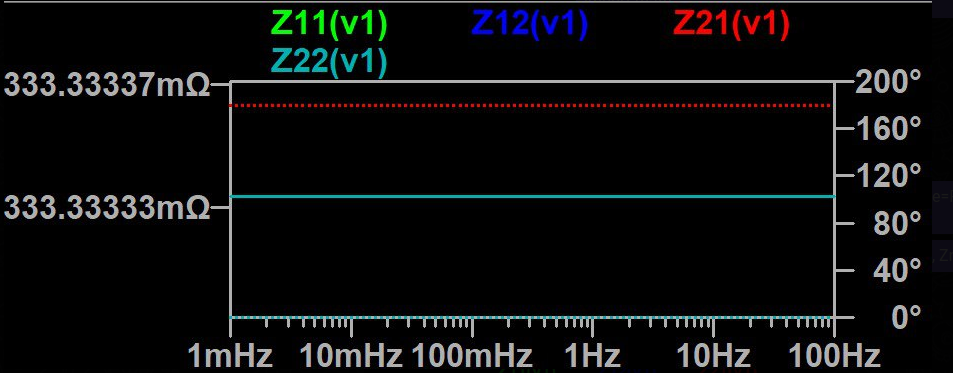

Calculo de los parametros del cuadripolo

Simulacion en Spice - Transferencia
* Ejercicio 2:

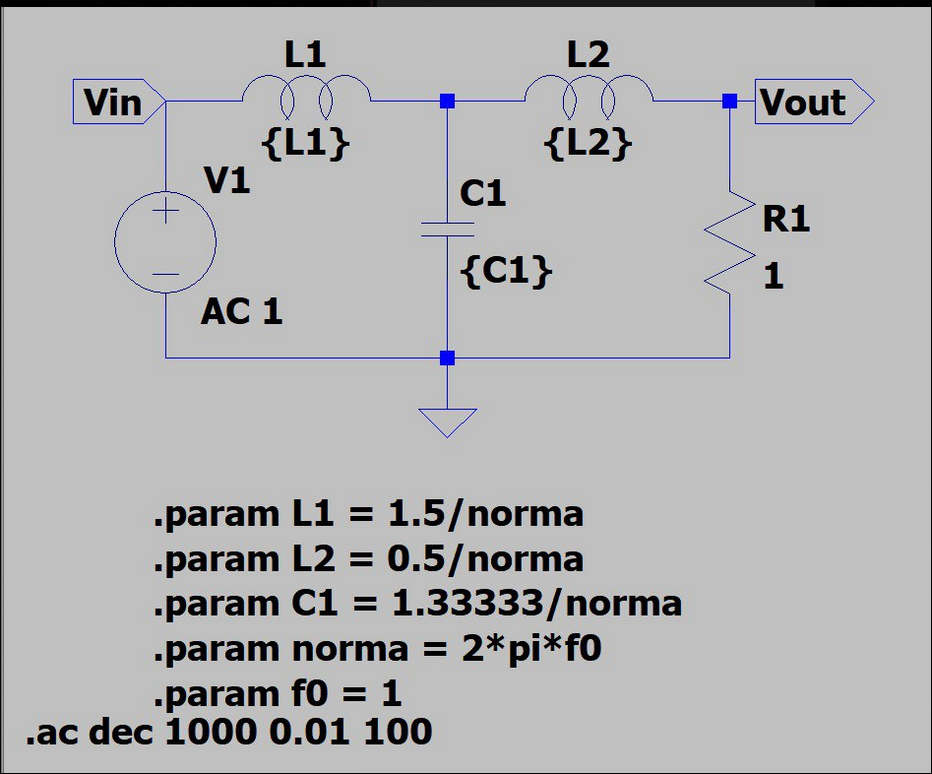

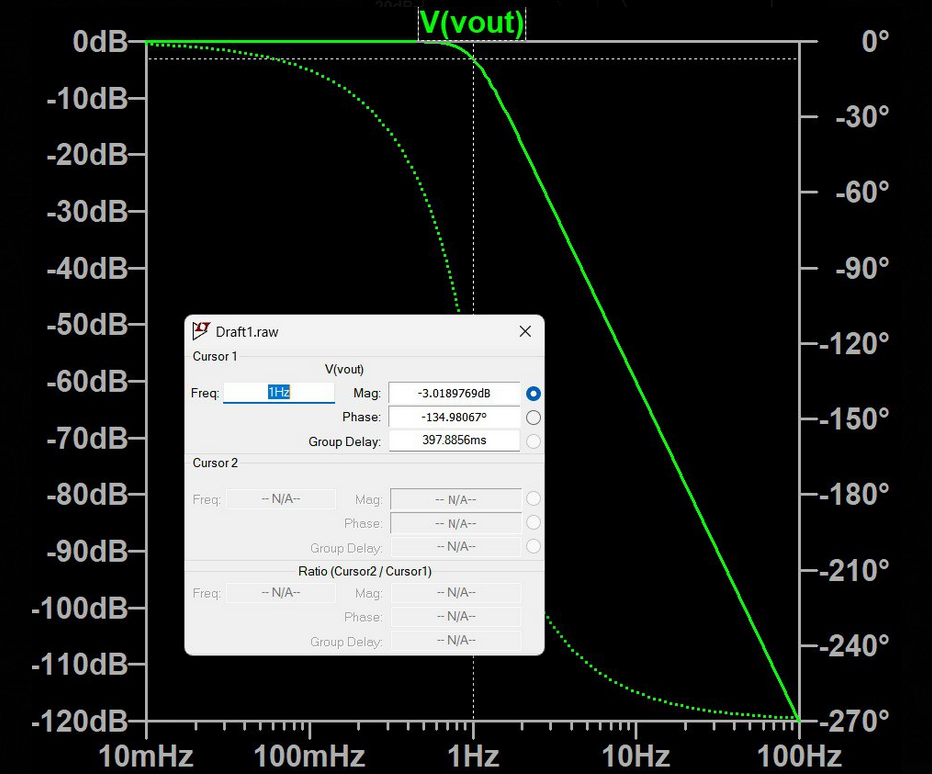

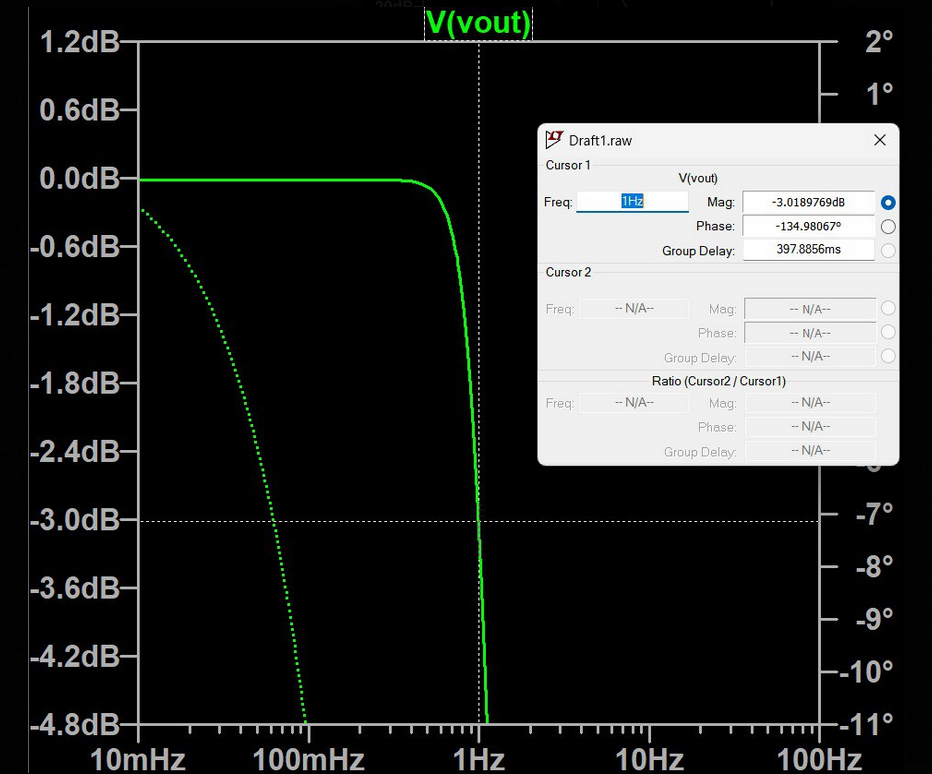